# Explore here

In [98]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos desde la URL
url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
datos = pd.read_csv(url)

# Mostrar las primeras filas del DataFrame
datos.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [99]:
datos.shape

(48895, 16)

In [100]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

observamos que que data tiene 48895 filas y 16 columnas, observamos que tanto la columna last_review como reviews_per_month tienen mas de 1000 valores nulos

In [101]:
datos.duplicated().sum()

np.int64(0)

In [102]:
data_limpio = datos.drop(["id","name", "host_name","number_of_reviews", "last_review", "reviews_per_month", "calculated_host_listings_count" ], axis = 1, inplace = False)
data_limpio.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,0


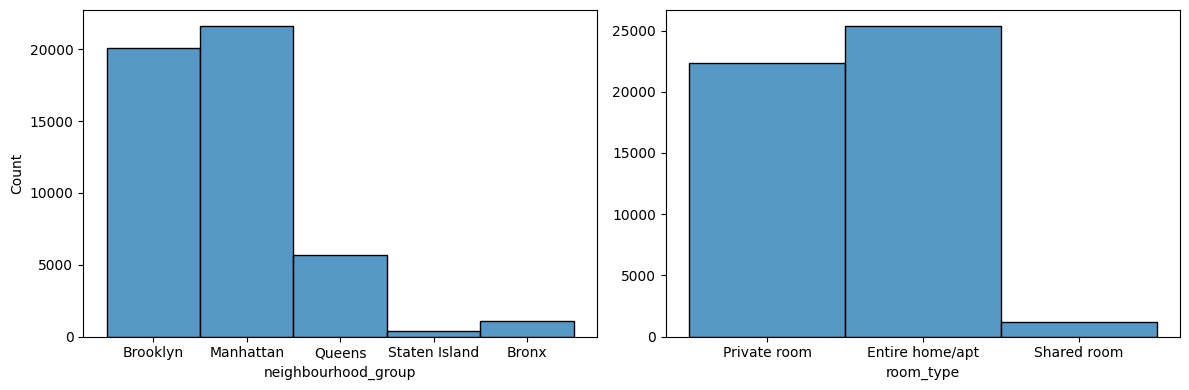

In [115]:
#Analisis sobre variables categoricas
fig, axis = plt.subplots(1, 2, figsize = (12, 4))

# Crear un histograma múltiple
sns.histplot(ax = axis[0], data = data_limpio, x = "neighbourhood_group")
sns.histplot(ax = axis[1], data = data_limpio, x = "room_type").set(ylabel = None)
plt.tight_layout()
plt.show()





- **Survived**: El número de personas que no sobrevivieron superan en más de 300 a los que sí lo hicieron.
- **Sex**: En el Titanic había casi el doble de hombres que de mujeres.
- **Pclass**: La suma de los pasajeros que viajaban en primera y segunda clase era casi idéntica a las que viajaban en tercera.
- **Embarked**: La mayoría de los pasajeros del Titanic embarcaron en la estación de Southampton (`S`).
- **SibSp**: Más de 800 pasajeros viajaron solos. Los restantes, con su pareja o alguien más de su familia.
- **Parch**: Casi todos los pasajeros viajaron sin padres o hijos. Una pequeña parte sí lo hizo.

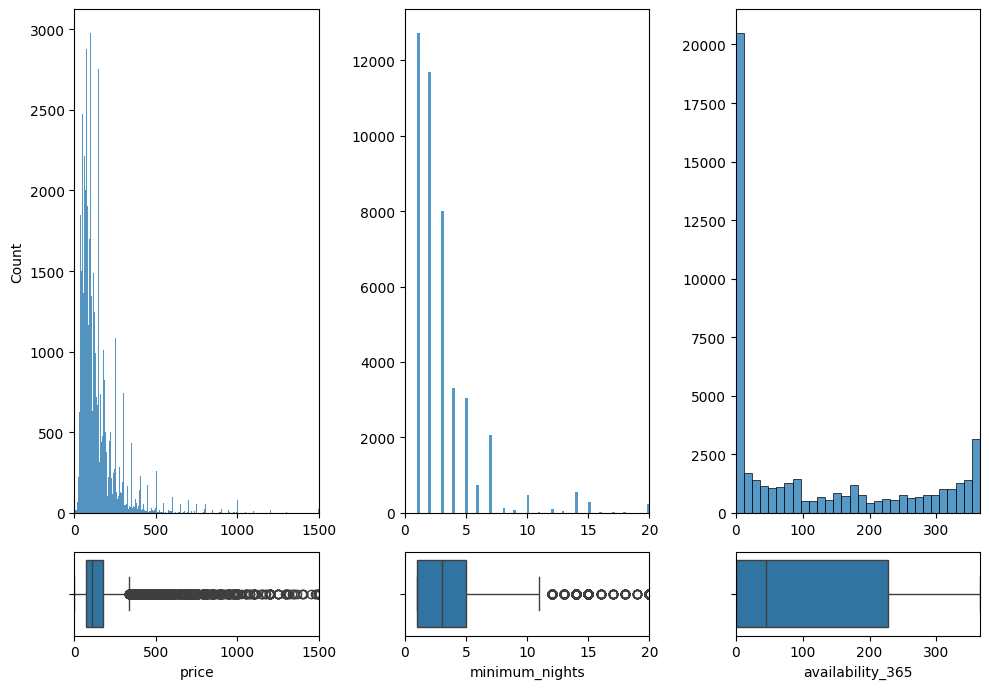

In [130]:
fig, axis = plt.subplots(2, 3, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = data_limpio, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = data_limpio, x = "price")
sns.histplot(ax = axis[0, 1], data = data_limpio, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = data_limpio, x = "minimum_nights")
sns.histplot(ax = axis[0, 2], data = data_limpio, x = "availability_365").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 2], data = data_limpio, x = "availability_365")
axis[0,0].set_xlim(0,1500)
axis[1,0].set_xlim(0,1500)
axis[0,1].set_xlim(0,20)
axis[1,1].set_xlim(0,20)
axis[0,2].set_xlim(0,365)
axis[1,2].set_xlim(0,365)
plt.tight_layout()
plt.show()

- **Survived**: El número de personas que no sobrevivieron superan en más de 300 a los que sí lo hicieron.
- **Sex**: En el Titanic había casi el doble de hombres que de mujeres.
- **Pclass**: La suma de los pasajeros que viajaban en primera y segunda clase era casi idéntica a las que viajaban en tercera.
- **Embarked**: La mayoría de los pasajeros del Titanic embarcaron en la estación de Southampton (`S`).
- **SibSp**: Más de 800 pasajeros viajaron solos. Los restantes, con su pareja o alguien más de su familia.
- **Parch**: Casi todos los pasajeros viajaron sin padres o hijos. Una pequeña parte sí lo hizo.

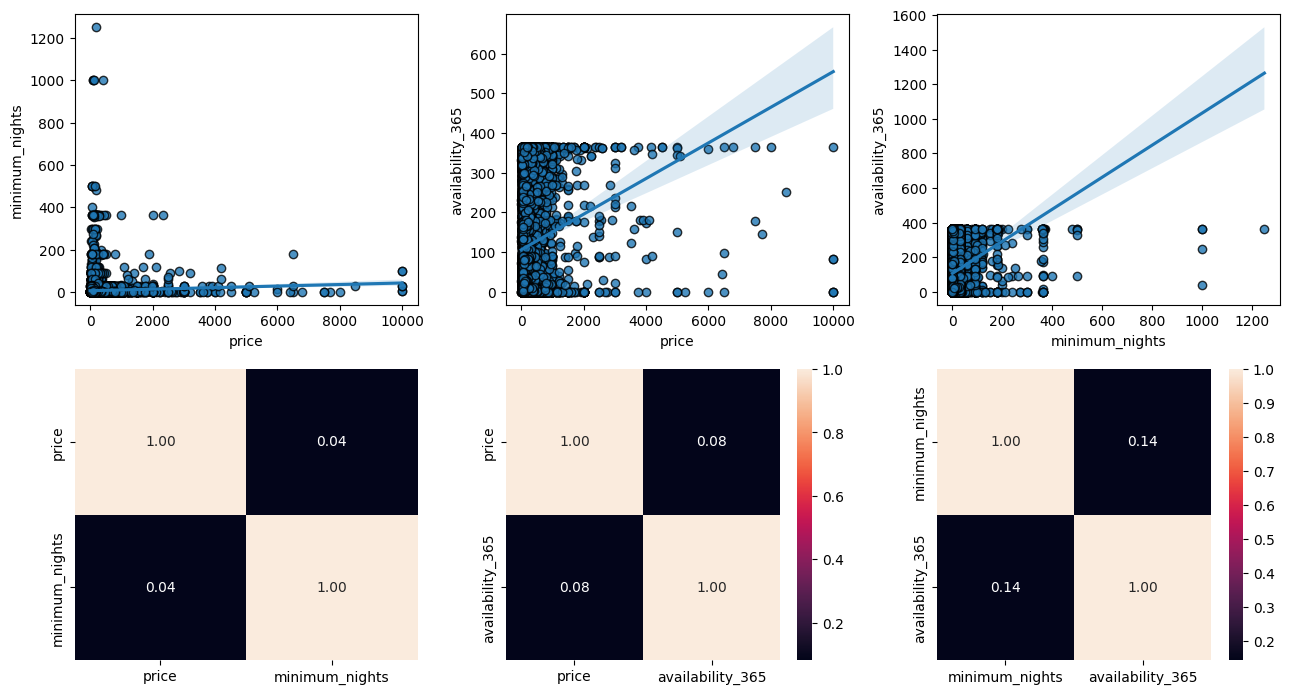

In [141]:
#Analisis numerico-numerico
fig, axis = plt.subplots(2, 3, figsize = (13, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = data_limpio, x = "price", y = "minimum_nights",scatter_kws = {'edgecolor': 'k'})
sns.heatmap(data_limpio[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = data_limpio, x = "price", y = "availability_365",scatter_kws = {'edgecolor': 'k'})
sns.heatmap(data_limpio[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[0, 2], data = data_limpio, x = "minimum_nights", y = "availability_365",scatter_kws = {'edgecolor': 'k'})
sns.heatmap(data_limpio[["minimum_nights", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 2])
# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

- **Survived**: El número de personas que no sobrevivieron superan en más de 300 a los que sí lo hicieron.
- **Sex**: En el Titanic había casi el doble de hombres que de mujeres.
- **Pclass**: La suma de los pasajeros que viajaban en primera y segunda clase era casi idéntica a las que viajaban en tercera.
- **Embarked**: La mayoría de los pasajeros del Titanic embarcaron en la estación de Southampton (`S`).
- **SibSp**: Más de 800 pasajeros viajaron solos. Los restantes, con su pareja o alguien más de su familia.
- **Parch**: Casi todos los pasajeros viajaron sin padres o hijos. Una pequeña parte sí lo hizo.

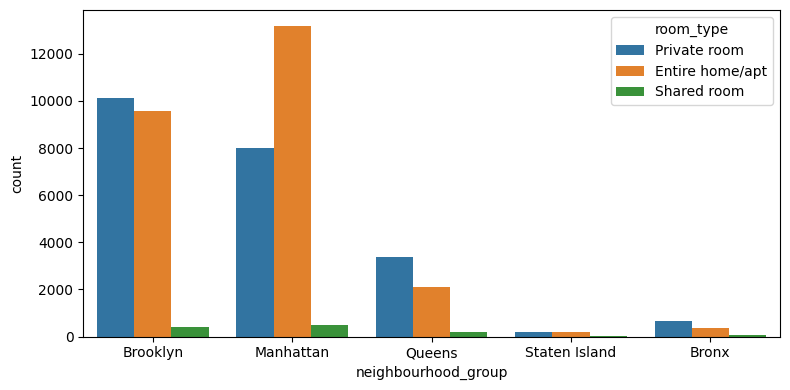

In [145]:
#Analisis categorico-categorico

plt.figure(figsize=(8,4))
sns.countplot( data = data_limpio, x = "neighbourhood_group", hue = "room_type")


plt.tight_layout()


plt.show()

In [ ]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = data_limpio, x = "Sex", y = "Survived", hue = "Pclass")
sns.barplot(ax = axis[1], data = total_data, x = "Embarked", y = "Survived", hue = "Pclass").set(ylabel = None)

plt.tight_layout()

plt.show()